# Assignment

## Instructions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

1.  **K-Means Clustering on Iris Dataset:**

    - Use the Iris dataset to perform K-Means clustering.
    - Determine the optimal number of clusters using the elbow method.

In [2]:
iris_df = sns.load_dataset('iris')
iris_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

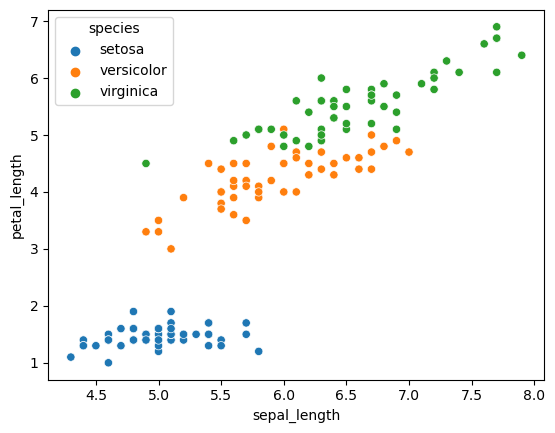

In [3]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

In [4]:
# remove the species column
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

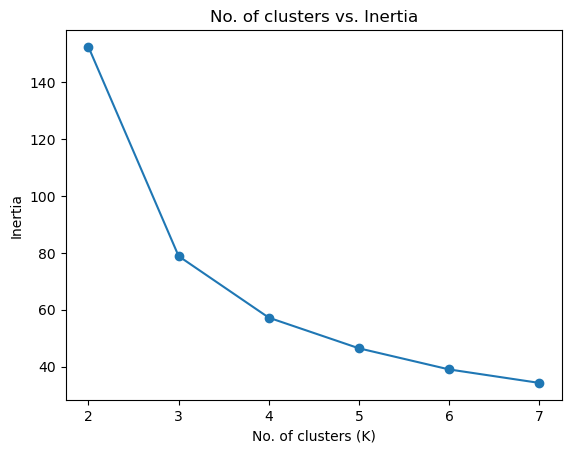

In [6]:
# Determine the optimal number of clusters using the elbow method
options = range(2,8)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [7]:
# Both 3 and 4 looks like the optimal number of clusters

In [8]:
# Try creating 3 cluster
model = KMeans(n_clusters=3, random_state=42).fit(X)
preds = model.predict(X)
preds

/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


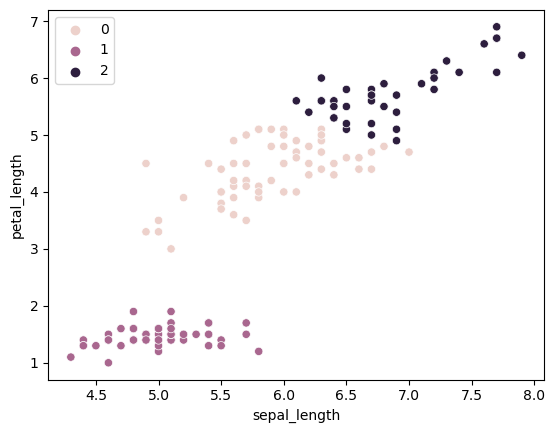

In [9]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

In [10]:
# Try creating 4 cluster
model = KMeans(n_clusters=4, random_state=42).fit(X)
preds = model.predict(X)
preds

/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)

/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


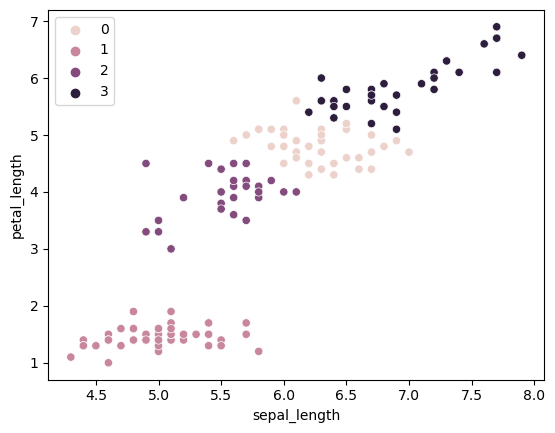

In [11]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

In [12]:
# Conclusion: n_clusters=3

2.  **DBSCAN on Iris Dataset:**
    - Apply DBSCAN clustering on the Iris dataset.
    - Experiment with different values for `eps` and `min_samples` to find meaningful clusters.

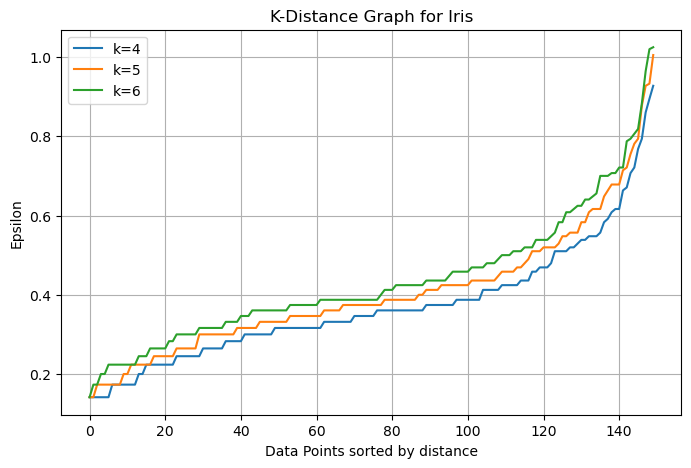

In [ ]:
# Determine the optimal eps and min_samples value using the elbow method
k4 = 4
neigh = NearestNeighbors(n_neighbors=k4)
nbrs = neigh.fit(X)
distances4, indices4 = nbrs.kneighbors(X)
distances4 = np.sort(distances4[:, k4-1], axis=0)

k5 = 5
neigh = NearestNeighbors(n_neighbors=k5)
nbrs = neigh.fit(X)
distances5, indices5 = nbrs.kneighbors(X)
distances5 = np.sort(distances5[:, k5-1], axis=0)

k6 = 6
neigh = NearestNeighbors(n_neighbors=k6)
nbrs = neigh.fit(X)
distances6, indices6 = nbrs.kneighbors(X)
distances6 = np.sort(distances6[:, k6-1], axis=0)

# Plot the distances
plt.figure(figsize=(8,5))
plt.plot(distances4, label='k=4')
plt.plot(distances5, label='k=5')
plt.plot(distances6, label='k=6')
plt.title('K-Distance Graph for Iris')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Epsilon')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# eps optimal value = 0.5
# Try with min_samples 4, 5, 6

/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


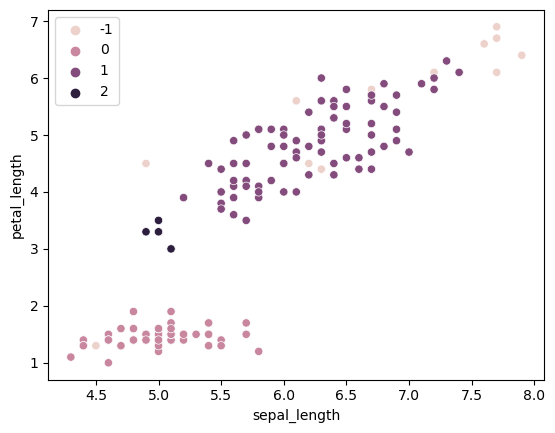

In [15]:
# eps=0.5, min_samples=4
model = DBSCAN(eps=0.5, min_samples=4)
model.fit(X)
model.labels_
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


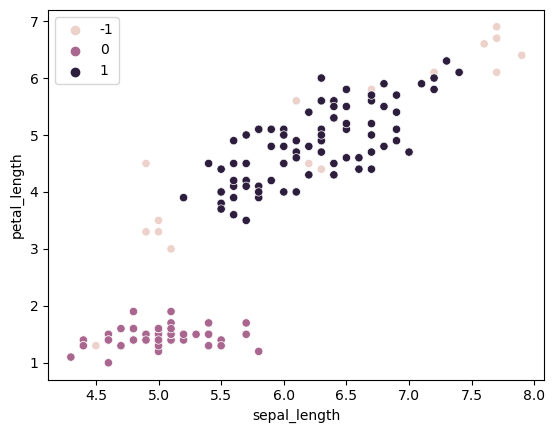

In [16]:
# eps=0.5, min_samples=5
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(X)
model.labels_
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/localuser/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


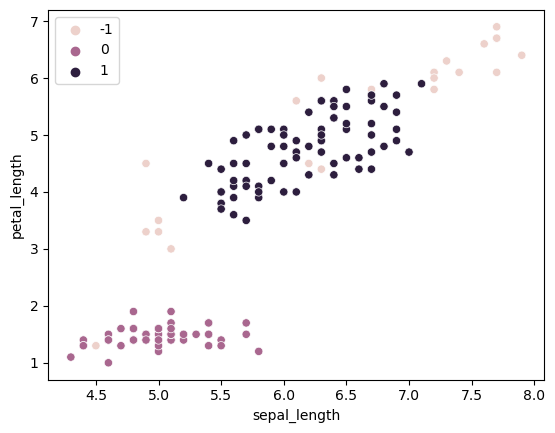

In [17]:
# eps=0.5, min_samples=6
model = DBSCAN(eps=0.5, min_samples=6)
model.fit(X)
model.labels_
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

In [18]:
# Conclusion: eps=0.5, min_samples=5